In [78]:
from PIL import Image
import numpy as np
import os
import cv2
import scipy

In [79]:
images = 'DRIVE' + os.sep + 'images'
segmented = 'DRIVE' + os.sep + 'segmented'

In [80]:
file = '01_test.tif'
# image = np.array(Image.open(images+os.sep+file))[:,:,1]
image = np.array(Image.open(images+os.sep+file))[:,:,1]

In [81]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_image = clahe.apply(image)

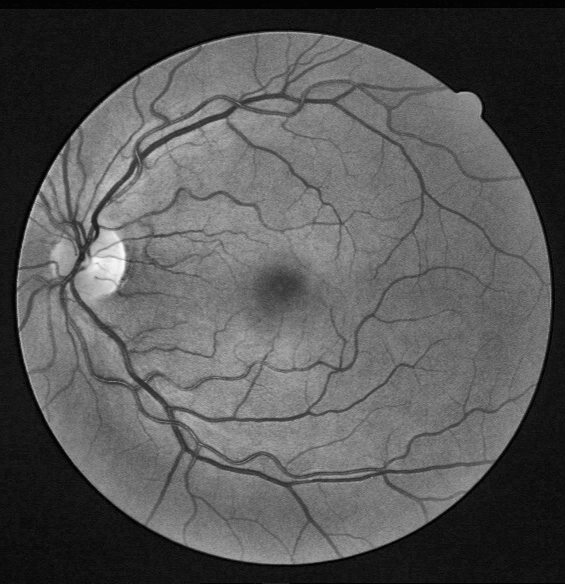

In [82]:
Image.fromarray(cl_image)

In [83]:
cl = cv2.GaussianBlur(cl_image,(51,51),4,2)
# cl_image = cl.copy()

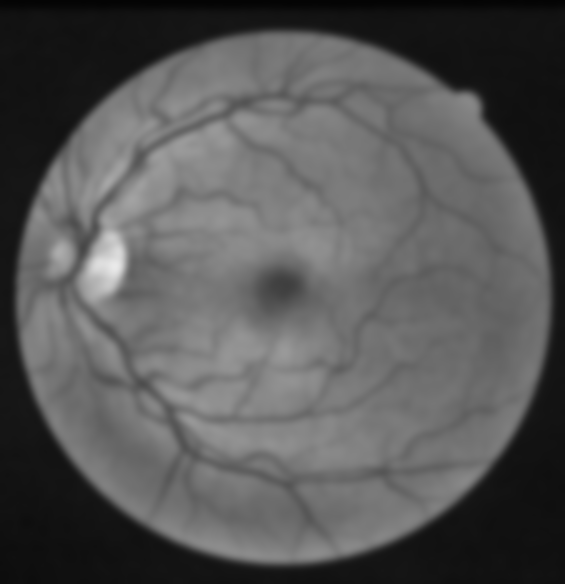

In [84]:
Image.fromarray(cl)

In [85]:
# opticfilter = imagegray[240:280, 80:120]
opticfilter = cl_image[220:300, 60:130]

In [86]:
# Image.fromarray(opticfilter).save('5_filter.png')

In [87]:
opticfilter = np.array(Image.open('5_filter.png'))

In [88]:
opticfilter_norm = opticfilter / opticfilter.sum()

In [89]:
opticfilter_norm.sum()

1.0

In [90]:
from PIL import Image
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2


img = np.ones((21,21))
disk = cv2.circle(img,(10,10), 20, (255,255,255), -1)

imagegray = cl_image.copy()

GaussFilt = scipy.ndimage.gaussian_filter(opticfilter, sigma = 3)

grayblur = scipy.ndimage.gaussian_filter(imagegray, sigma = 2)

print(GaussFilt.shape)
print(disk.shape)
# gaussianyellow = img * GaussFilt


Image.fromarray(img.astype(np.uint8))

(80, 70)
(21, 21)


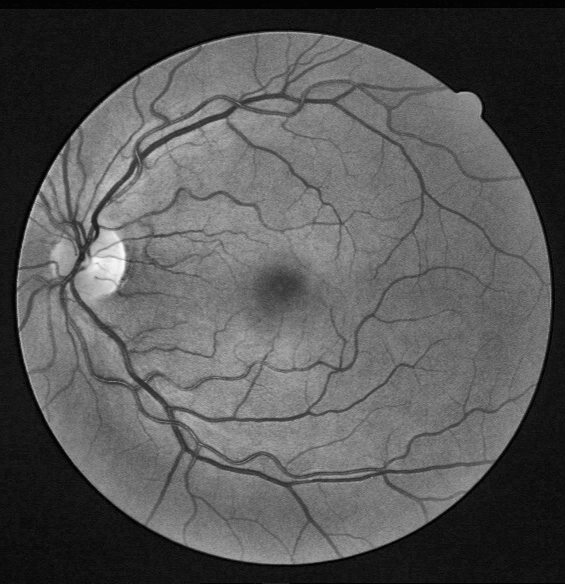

In [91]:
Image.fromarray(imagegray)

In [92]:
# dataCube = scipy.ndimage.filters.gaussian_filter(dataCube, sigma, truncate=8)
data = scipy.ndimage.convolve(imagegray, opticfilter/opticfilter.sum())
# data = scipy.ndimage.convolve(grayblur, img/img.sum())
# print('imagegray', type(imagegray))
# print('img', type(img))
# scipy.ndimage.correlate(image, disk, mode='constant').transpose()

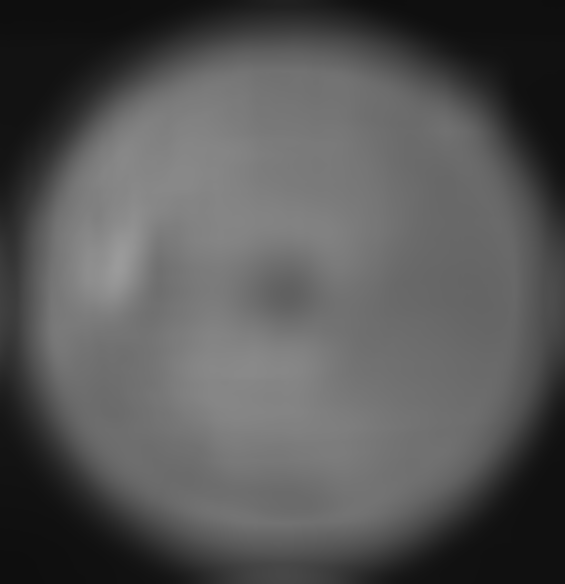

In [93]:
Image.fromarray(data)

In [94]:
max_number = np.max(data)

In [95]:
max_number

155

In [96]:
min_number = np.min(data)

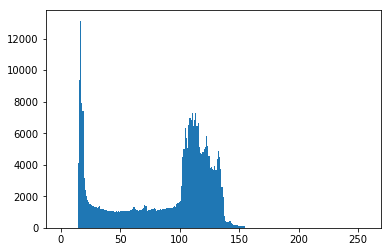

In [97]:
plt.hist(data.ravel(),256,[0,256]); plt.show()

In [98]:
mm = data.copy()
mm[xy[:,0], xy[:,1]] = 255
Image.fromarray(mm)

NameError: name 'xy' is not defined

In [ ]:
data2 = data.copy()
np.where(data2 == max_number)

In [ ]:
data1 = data.copy()
data1[data1<(max_number-10)]= 0
data1[data1>=(max_number-10)]=255

In [ ]:
Image.fromarray(data1)

In [99]:
imagegray

array([[ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       ...,
       [12, 12, 12, ..., 21, 21, 18],
       [12, 12, 12, ..., 18, 15, 15],
       [15, 15, 15, ...,  3,  3,  4]], dtype=uint8)

In [100]:
opticfilter

array([[ 80,  77,  73, ..., 102, 102, 102],
       [ 90,  83,  74, ...,  98,  99, 102],
       [ 94,  91,  82, ...,  99,  98,  97],
       ...,
       [ 87,  93,  96, ...,  80,  81,  84],
       [ 80,  81,  87, ...,  86,  82,  80],
       [ 79,  80,  79, ...,  84,  82,  84]], dtype=uint8)

In [101]:
a = np.array([[1,2,3], [4,5,6]])

In [102]:
Image.fromarray

<function PIL.Image.fromarray>

[0, 565, 584, 0]

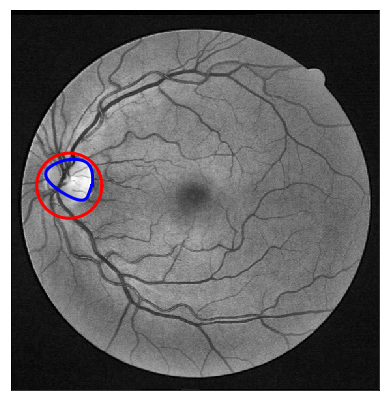

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
x = 90 + 50*np.cos(s)
y = 270 + 50*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(imagegray, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(imagegray, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '-r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, imagegray.shape[1], imagegray.shape[0], 0])

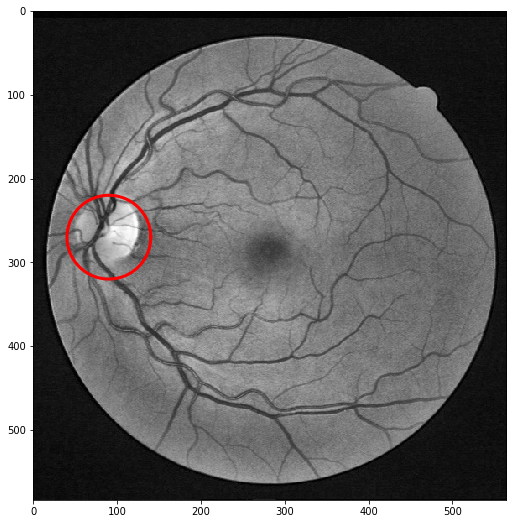

In [164]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(imagegray, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '-r', lw=3)

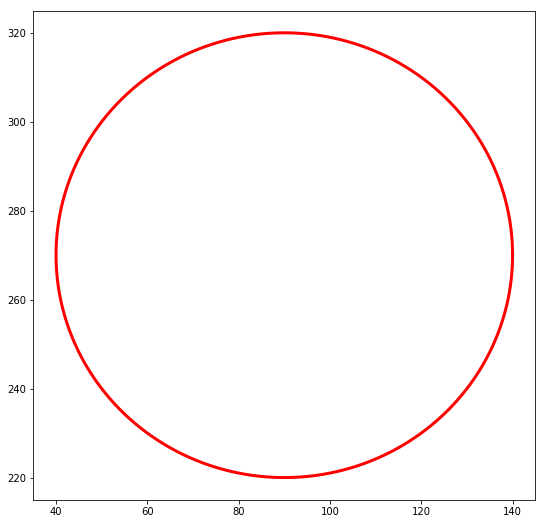

In [165]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(init[:, 0], init[:, 1], '-r', lw=3)

In [64]:
# define the list of boundaries
boundaries = [
    ([200, 200, 0], [255, 255, 25])
]
# define the list of boundaries
boundaries = [
    ([17, 15, 100], [50, 56, 200]),
    ([86, 31, 4], [220, 88, 50]),
    ([25, 146, 190], [62, 174, 250]),
    ([103, 86, 65], [145, 133, 128])
]

In [251]:
# loop over the boundaries
for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
 
    # show the images
#     Image.fromarray([image, output])
    cv2.imshow("images", np.hstack([image, output]))
    cv2.waitKey(0)

In [252]:
 python detect_color.py --image pokemon_games.png

SyntaxError: invalid syntax (<ipython-input-252-55e9594b0ce1>, line 1)

In [ ]:
mask.shape()

In [1]:
from turtle import *
import math

apple = Turtle()

def polygon(t, n, length):
    for i in range(n):
        left(360/n)
        forward(length)

In [ ]:
from tkinter import *
root = Tk()
root.geometry("500x900")
canvas = Canvas(root, width=550, height=820)
canvas.pack()
png = PhotoImage(file = r'example.png') # Just an example
canvas.create_image(0, 0, image = png, anchor = "nw")

a = canvas.create_rectangle(50, 0, 50, 0, fill='red')
canvas.move(a, 20, 20)

In [8]:
import numpy as np
import cv2
from PIL import Image

In [56]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
# img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

In [57]:
img = cv2.rectangle(img,(0, 0),(25,25),(255,255,0),3)

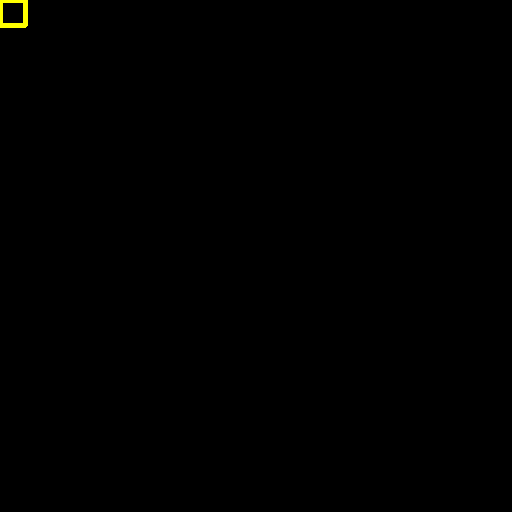

In [58]:
Image.fromarray(img)

In [24]:
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

In [13]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

In [14]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html

SyntaxError: invalid syntax (<ipython-input-14-bb167be74ef5>, line 3)

In [15]:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html

SyntaxError: invalid syntax (<ipython-input-15-8c37772e248a>, line 1)

In [76]:
 # yellow color
colorLower = np.array([100, 100, 0], dtype = "uint8")
colorUpper = np.array([255, 255, 150], dtype = "uint8")
# hsv_img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
red_mask = cv2.inRange(image, colorLower, colorUpper)
red = cv2.bitwise_and(image, image, mask=red_mask)

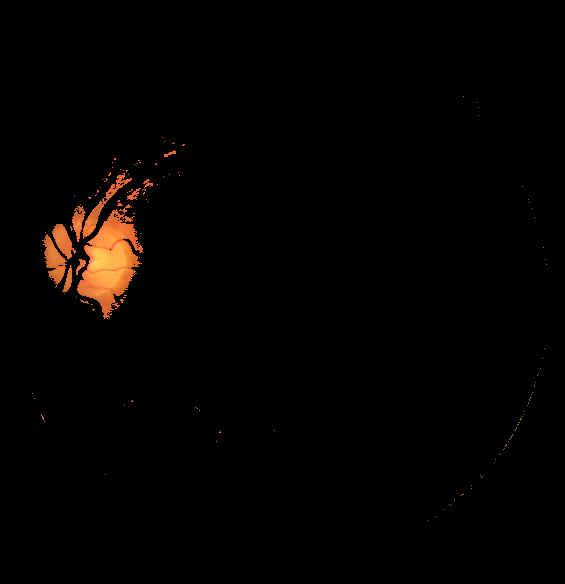

In [77]:
# np.unique(red_mask,return_counts=True)
Image.fromarray(red)

In [68]:
#  # Blue color
# low_blue = np.array([94, 80, 2])
# high_blue = np.array([126, 255, 255])
# blue_mask = cv2.inRange(image, low_blue, high_blue)
# blue = cv2.bitwise_and(image, image, mask=blue_mask)

# # Green color
# low_green = np.array([25, 52, 72])
# high_green = np.array([102, 255, 255])
# green_mask = cv2.inRange(image, low_green, high_green)
# green = cv2.bitwise_and(image, image, mask=green_mask)

# # Every color except white
# low = np.array([0, 42, 0])
# high = np.array([179, 255, 255])
# mask = cv2.inRange(image, low, high)
# result = cv2.bitwise_and(image, image, mask=mask)

In [10]:
cv2.imshow("image", image)
cv2.imshow("Red", red)
# cv2.imshow("Blue", blue)
# cv2.imshow("Green", green)
cv2.imshow("Result", result)
    

NameError: name 'result' is not defined

In [49]:
Gaussian = cv2.getGaussianKernel(ksize=[1,1],sigma=1)

TypeError: an integer is required (got type list)

In [48]:
# from PIL import Image
# import scipy.ndimage
# import numpy as np
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2

# # radius = 5
# img = np.zeros((3,3,3))
# # disk = img
# disk = cv2.circle(img,(1,1), 1, (255,255,255), -1)
# # r = 10
# # y,x = np.ogrid[-r: r+1, -r: r+1]
# # disk = x**2+y**2 <= r**2
# # disk = disk.astype(float)
# # Gauss = np.random.normal(51,51, 3)
# GaussFilt = scipy.ndimage.gaussian_filter(img, sigma = [4,4,1])
# # Gussi = scipy.ndimage.gaussian_filter(disk, sigma = 1)

# print(GaussFilt.shape)
# print(disk.shape)
# gaussianyellow = img * GaussFilt

# # Image.fromarray(img.astype(np.uint8))
# imagegray = image[:,:,1]
# # circlegray = img[:,:,1]/255
# Image.fromarray(img[:,:,0].astype(np.uint8))

# data = scipy.ndimage.convolve(imagegray, img[:,:,0])

(3, 3, 3)
(3, 3, 3)
